### 图像梯度-Sobel算子  
---卷积的作用除了实现图像模糊或者去噪，还可以寻找一张图像上所有梯度信息，这些梯度信息是图像的最原始特征数据，进一步处理之后就可以生成一些比较高级的特征用来表示一张图像实现基于图像特征的匹配，图像分类等应用。  
---Sobel算子是一种很经典的图像梯度提取算子，其本质是基于图像空间域卷积，背后的思想是图像一阶导数算子的理论支持。  
---sobel算子主要用于获得数字图像的一阶梯度，常见的应用和物理意义是边缘检测。（Laplacian边缘检测并不局限于水平方向或垂直方向，这是Laplacian与soble的区别）

In [1]:
import cv2
import numpy as np
#显示图像函数
def cv_show(name,img):
    cv2.imshow(name,img)
    while cv2.waitKey(100) != 27:# loop if not get ESC
        if cv2.getWindowProperty(name,cv2.WND_PROP_VISIBLE) <= 0:
            break
    cv2.destroyWindow(name)

In [2]:
img = cv2.imread('pie.png',cv2.IMREAD_GRAYSCALE)
cv_show('image',img)

dst = cv2.Sobel(src, ddepth, dx, dy, ksize)
- ddepth:图像的深度，一般取-1  
- dx和dy分别表示水平和竖直方向
- ksize是Sobel算子的大小



In [11]:
#沿水平方向对其梯度进行提取
sobel_x = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=3)  #ddepth = -1/CV_64F
cv_show('sobel',sobel_x)

白到黑是正数，黑到白就是负数了，所有的负数会被截断成0，所以要取绝对值

In [6]:
sobel_x = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=3)
sobel_x = cv2.convertScaleAbs(sobel_x)
cv_show('sobel_abs_X',sobel_x)

In [4]:
#沿着竖直方向
sobel_y = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=3)
sobel_y = cv2.convertScaleAbs(sobel_y)
cv_show('sobel_abs_y',sobel_y)

分别计算x和y，再求和

In [9]:
sobel_xy = cv2.addWeighted(sobel_x,0.5,sobel_y,0.5,0)
cv_show('sobel_xy',sobel_xy)

不建议直接计算

In [11]:
sobelxy=cv2.Sobel(img,cv2.CV_64F,1,1,ksize=3)
sobelxy = cv2.convertScaleAbs(sobelxy) 
cv_show('sobelxy',sobelxy)

以lena照片为例，观察提取到的边缘特征

In [13]:
img = cv2.imread('lena.jpg',cv2.IMREAD_GRAYSCALE)
cv_show('lena',img)

In [14]:
sobel_x = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=3)
sobel_x = cv2.convertScaleAbs(sobel_x)
sobel_y = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=3)
sobel_y = cv2.convertScaleAbs(sobel_y)
sobel_xy = cv2.addWeighted(sobel_x,0.5,sobel_y,0.5,0)
cv_show('sobel_lena',sobel_xy)

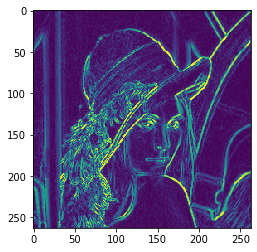

In [16]:
import matplotlib.pyplot as plt 
plt.imshow(sobel_xy)        #plt与cv2的显示图像彩色通道顺序不一样所以显色有差异

### 图像梯度-Scharr算子  
图像梯度-Scharr算子,能够捕获更加细致的纹理信息。

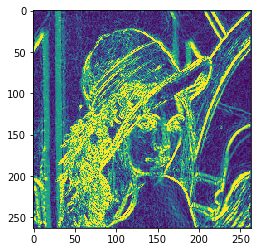

In [23]:
scharr_x = cv2.Scharr(img,cv2.CV_64F,1,0)
scharr_y = cv2.Scharr(img,cv2.CV_64F,0,1)
scharr_x = cv2.convertScaleAbs(scharr_x)
scharr_y = cv2.convertScaleAbs(scharr_y)
scharr_xy = cv2.addWeighted(scharr_x,0.5,scharr_y,0.5,0)
# cv_show('scharr',scharr_xy)
plt.imshow(scharr_xy)


### 图像梯度-laplacian算子


In [24]:
laplacian = cv2.Laplacian(img,cv2.CV_64F)
laplacian = cv2.convertScaleAbs(laplacian)

res = np.hstack((sobel_xy,scharr_xy,laplacian))
cv_show('res',res)